<a href="https://colab.research.google.com/github/bnrm96/TCC_redes_neurais/blob/main/TCC_estadual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importa as biblioteca tudo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pydot
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [ ]:
def tem_repeticao(numero):
    # Converte o número em uma string para poder iterar sobre os dígitos
    numero = str(numero)
    soma = 1
    # Verifica se há algum dígito repetido
    for digito in numero:
        if numero.count(digito) > 3:
            return True

    # Verifica se os dígitos estão em sequência
    for i in range(len(numero) - 1):
        if int(numero[i]) + 1 == int(numero[i + 1]):
            soma = soma + 1
        if soma == 4:
            return True

    # Se não houver nenhum dígito repetido ou em sequência, retorna False
    return False

# Testa a função com alguns exemplos
print(tem_repeticao(1234))  # True (todos os digitos em sequência)
print(tem_repeticao(1224))  # False 
print(tem_repeticao(1235))  # False 
print(tem_repeticao(5678))  # False
print(tem_repeticao(5677))  # True (dígitos em sequência)
print(tem_repeticao(8888))


True
False
False
True
False
True


In [ ]:
# Lê o arquivo csv usando a função read_csv do Pandas
base = pd.read_csv('base_estadual_completa.csv',sep = ';')


In [ ]:
base

,NR_CANDIDATO,NR_PARTIDO,SG_UF_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,RESULTADO
0,13000,13,0,44,2,7,9,500000.00,0,3
1,12456,12,0,61,2,6,3,100000.00,0,3
2,40777,40,0,49,2,8,3,500000.00,0,3
3,31888,31,0,46,2,6,3,500000.00,0,3
4,43345,43,1,58,2,8,1,250000.00,0,3
...,...,...,...,...,...,...,...,...,...,...
1142,12121,12,1,44,4,6,5,1270629.01,0,4
1143,77421,77,0,48,4,6,1,1270629.01,0,3
1144,10000,10,0,37,4,8,3,1270629.01,0,4
1145,51511,51,0,43,2,6,3,1270629.01,0,4


In [ ]:
base.shape

(1147, 10)

##Aplicando a função que eu criei nos dados de número de candidato

In [ ]:
base['NR_CANDIDATO'] = base['NR_CANDIDATO'].apply(tem_repeticao)


In [ ]:
base

,NR_CANDIDATO,NR_PARTIDO,SG_UF_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,RESULTADO
0,False,13,0,44,2,7,9,500000.00,0,3
1,True,12,0,61,2,6,3,100000.00,0,3
2,False,40,0,49,2,8,3,500000.00,0,3
3,False,31,0,46,2,6,3,500000.00,0,3
4,False,43,1,58,2,8,1,250000.00,0,3
...,...,...,...,...,...,...,...,...,...,...
1142,False,12,1,44,4,6,5,1270629.01,0,4
1143,False,77,0,48,4,6,1,1270629.01,0,3
1144,True,10,0,37,4,8,3,1270629.01,0,4
1145,False,51,0,43,2,6,3,1270629.01,0,4


In [ ]:
base

,NR_CANDIDATO,NR_PARTIDO,SG_UF_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,RESULTADO
0,False,13,0,44,2,7,9,500000.00,0,3
1,True,12,0,61,2,6,3,100000.00,0,3
2,False,40,0,49,2,8,3,500000.00,0,3
3,False,31,0,46,2,6,3,500000.00,0,3
4,False,43,1,58,2,8,1,250000.00,0,3
...,...,...,...,...,...,...,...,...,...,...
1142,False,12,1,44,4,6,5,1270629.01,0,4
1143,False,77,0,48,4,6,1,1270629.01,0,3
1144,True,10,0,37,4,8,3,1270629.01,0,4
1145,False,51,0,43,2,6,3,1270629.01,0,4


##FAZENDO A MATRIZ DE CORRELAÇÃO LOGO ANTES QUE EU ME ESQUEÇA

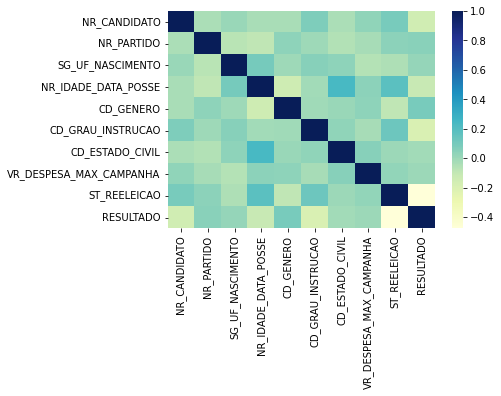

In [ ]:
corr = base.corr()

# Usamos o método heatmap do seaborn para plotar a matriz de correlação
sns.heatmap(corr, annot=False, cmap="YlGnBu")

# Exibimos o gráfico
plt.show()

# Separando o que eu vou usar de entrada do que eu vou usar de saída

In [ ]:
base = base.reindex(columns=['ST_REELEICAO','VR_DESPESA_MAX_CAMPANHA','CD_ESTADO_CIVIL','CD_GRAU_INSTRUCAO', 'CD_GENERO','NR_IDADE_DATA_POSSE','SG_UF_NASCIMENTO','NR_PARTIDO', 'NR_CANDIDATO', 'RESULTADO'])

In [ ]:
base

,ST_REELEICAO,VR_DESPESA_MAX_CAMPANHA,CD_ESTADO_CIVIL,CD_GRAU_INSTRUCAO,CD_GENERO,NR_IDADE_DATA_POSSE,SG_UF_NASCIMENTO,NR_PARTIDO,NR_CANDIDATO,RESULTADO
0,0,500000.00,9,7,2,44,0,13,False,3
1,0,100000.00,3,6,2,61,0,12,True,3
2,0,500000.00,3,8,2,49,0,40,False,3
3,0,500000.00,3,6,2,46,0,31,False,3
4,0,250000.00,1,8,2,58,1,43,False,3
...,...,...,...,...,...,...,...,...,...,...
1142,0,1270629.01,5,6,4,44,1,12,False,4
1143,0,1270629.01,1,6,4,48,0,77,False,3
1144,0,1270629.01,3,8,4,37,0,10,True,4
1145,0,1270629.01,3,6,2,43,0,51,False,4


In [ ]:
x = base.iloc[: , 1:9].values
y = base.iloc[: , 9].values

In [ ]:
x[0]

array([500000.0, 9, 7, 2, 44, 0, 13, False], dtype=object)

In [ ]:
y[0]

3

# Transformando as variáveis que são letras em variáveis numéricas

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x[:,3] = label_encoder.fit_transform(x[:,3])
x[:,4] = label_encoder.fit_transform(x[:,4])
x[:,11] = label_encoder.fit_transform(x[:,11])

In [ ]:
x[1]

array([100000.0, 3, 6, 2, 61, 0, 12, True], dtype=object)

# Normalizando esse treco

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(x)

In [ ]:
print(X[1])

[-1.25889699  0.02591193 -0.46058256 -0.63419279  1.25193965 -0.45118475
 -1.19928358  2.00218222]


# Vamos organizar a saída pra que seja uma variável binária mas com o 1 em apenas uma das casas

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y.shape

(1147,)

# Pra isso preciso fazer o reshape do y

In [ ]:
y = y.reshape(-1, 1)
y.shape

(1147, 1)

Agora vamos fazer isso de fato

In [ ]:
y = onehot.fit_transform(y).toarray()
y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

# Aqui vamos organizar o treinamento da rede neural
(lembrando que a gente ta usando 70% das amostras como treinamento e 30% de teste) 

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.24, shuffle ='false' )

In [ ]:
X_treinamento.shape

(871, 8)

In [ ]:
X_teste.shape

(276, 8)

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

tf.__version__

'2.9.2'

# Só pra conferir se temos a quantidade de neuronios nas camadas corretamente

In [ ]:
neuronios_entrada = X.shape[1]
neuronios_entrada

8

In [ ]:
neuronios_oculta = int(np.ceil((X.shape[1] + y.shape[1]) / 2))
neuronios_oculta

6

In [ ]:
neuronios_saida = y.shape[1]
neuronios_saida

4

# Criando as variáveis de pesos

In [ ]:
W = {'oculta': tf.Variable(tf.random.normal([neuronios_entrada, neuronios_oculta])),
     'saida': tf.Variable(tf.random.normal([neuronios_oculta, neuronios_saida]))}

# Criando as variáveis de baias

In [ ]:
b = {'oculta': tf.Variable(tf.random.normal([neuronios_oculta])),
     'saida': tf.Variable(tf.random.normal([neuronios_saida]))}

# Definindo o teste

In [ ]:
X_treinamento = tf.convert_to_tensor(X_treinamento, dtype = tf.float32, name = 'X')
y_treinamento = tf.convert_to_tensor(y_treinamento, dtype = tf.float32, name = 'y')
X_teste = tf.convert_to_tensor(X_teste, dtype = tf.float32, name = 'X')
y_teste = tf.convert_to_tensor(y_teste, dtype = tf.float32, name = 'y')

# Definindo o detalhes de treinamento

In [ ]:
def mlp(x, W, bias):
    camada_oculta = tf.add(tf.matmul(x, W['oculta']), bias['oculta'])
    camada_oculta_ativacao = tf.nn.relu(camada_oculta)
    camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
    return camada_saida

# Primeiro preciso criar o exemplo de modelo e a variavel erro
Perceber que o softmax já existe aqui

In [ ]:
with tf.GradientTape() as tape:
    modelo = mlp(X_treinamento, W, b)
    erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_treinamento, logits = modelo))

In [ ]:
var_list = [W['oculta'], W['saida'], b['oculta'], b['saida']]

## Fazendo o primeiro treinamento

In [ ]:
W['oculta']

<tf.Variable 'Variable:0' shape=(8, 6) dtype=float32, numpy=
array([[ 0.3274685 , -0.8426258 ,  0.3194337 , -1.4075519 , -2.3880599 ,
        -1.0392479 ],
       [-0.5573232 ,  0.539707  ,  1.6994323 ,  0.28893656, -1.5066116 ,
        -0.26454744],
       [-0.59722406, -1.9171132 , -0.62044144,  0.8504023 , -0.40604794,
        -3.0258412 ],
       [ 0.9058464 ,  0.29855987, -0.22561555, -0.7616443 , -1.891714  ,
        -0.9384712 ],
       [ 0.77852213, -0.47338897,  0.97772694,  0.24694404,  0.20573747,
        -0.5256233 ],
       [ 0.32410017,  0.02545409, -0.10638497, -0.6369475 ,  1.1603122 ,
         0.2507359 ],
       [-0.41728497,  0.40125778, -1.4145442 , -0.59318566, -1.6617213 ,
         0.33567193],
       [ 0.10815629,  0.2347968 , -0.56668764, -0.35819843,  0.88698626,
         0.5274477 ]], dtype=float32)>

In [ ]:
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.0001)
gradientes = tape.gradient(erro, var_list)
otimizador.apply_gradients(zip(gradientes, var_list))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

Verificando `W['oculta']` depois da atualização.

In [ ]:
W['oculta']

<tf.Variable 'Variable:0' shape=(8, 6) dtype=float32, numpy=
array([[ 0.32736865, -0.84272575,  0.31953368, -1.407452  , -2.38796   ,
        -1.0391479 ],
       [-0.5574232 ,  0.53980696,  1.6993322 ,  0.2888366 , -1.5065116 ,
        -0.26444745],
       [-0.5973241 , -1.9172132 , -0.6203415 ,  0.85030234, -0.40594795,
        -3.0257413 ],
       [ 0.90594643,  0.2984599 , -0.22551556, -0.76154435, -1.891614  ,
        -0.9383712 ],
       [ 0.7786221 , -0.47328898,  0.9776269 ,  0.24684416,  0.20563748,
        -0.5255233 ],
       [ 0.32420015,  0.02555405, -0.10648496, -0.63684756,  1.1602122 ,
         0.25063643],
       [-0.41738492,  0.4011578 , -1.4144442 , -0.59308565, -1.6616213 ,
         0.33557197],
       [ 0.1080564 ,  0.23489664, -0.5665876 , -0.35829785,  0.88688624,
         0.5275477 ]], dtype=float32)>

### Treinamento

Como `X_treinamento` e `y_treinamento` já são tensores, vou convertê-los em um dataset para gerar batches.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_treinamento, y_treinamento))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(8,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>

In [ ]:
batch_size = 8
dataset = dataset.batch(batch_size)
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

Verificando o primeiro batch.

In [ ]:
next(iter(dataset))

(<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
 array([[-0.73925626,  0.02591193,  0.8870914 , -0.63419276,  2.2221334 ,
         -0.45118475, -0.25676692, -0.49945503],
        [-0.08970536,  0.02591193,  0.8870914 , -0.63419276, -0.86484647,
          2.216387  ,  0.7353559 , -0.49945503],
        [ 0.26186928,  0.02591193,  0.8870914 ,  1.5768076 ,  0.10534717,
          2.216387  ,  0.43771905, -0.49945503],
        [-0.08970536,  2.7278194 ,  0.8870914 ,  1.5768076 ,  0.45814484,
          2.216387  , -0.80243444, -0.49945503],
        [-0.08970536, -0.8747239 , -0.46058255, -0.63419276, -0.86484647,
         -0.45118475, -0.9512529 , -0.49945503],
        [ 1.0794863 ,  0.02591193,  0.8870914 , -0.63419276, -1.4822425 ,
         -0.45118475, -1.0504651 ,  2.0021822 ],
        [-0.08970536,  2.7278194 , -0.46058255, -0.63419276,  1.2519397 ,
         -0.45118475,  1.6778725 , -0.49945503],
        [-0.73925626, -0.8747239 , -0.46058255, -0.63419276, -0.42384934,
         -0.4511

Agora precisamos instanciar o dataset de novo para ele reiniciar a geração de batches.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_treinamento, y_treinamento)).batch(batch_size)

In [ ]:
for epoca in range(240):
    for X_batch, y_batch in dataset:
        erro_medio = 0.0
        with tf.GradientTape() as tape:
            modelo = mlp(X_batch, W, b)
            erro = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_batch, logits = modelo))
        gradientes = tape.gradient(erro, var_list)
        otimizador.apply_gradients(zip(gradientes, var_list))
        erro_medio += erro.numpy()
    if epoca % 20 == 0:
        print('Época: ' + str((epoca + 1)) + ' erro: ' + str(erro_medio))

Época: 1 erro: 13.284467697143555
Época: 21 erro: 8.898777961730957
Época: 41 erro: 5.584106922149658
Época: 61 erro: 2.8545126914978027
Época: 81 erro: 1.4058769941329956
Época: 101 erro: 0.9822949767112732
Época: 121 erro: 0.8650473356246948
Época: 141 erro: 0.8158435225486755
Época: 161 erro: 0.7913722395896912
Época: 181 erro: 0.7787636518478394
Época: 201 erro: 0.7716959714889526
Época: 221 erro: 0.7674039006233215


In [ ]:
W

{'oculta': <tf.Variable 'Variable:0' shape=(8, 6) dtype=float32, numpy=
 array([[-0.13063198, -1.1387465 ,  0.68331206, -1.5032583 , -1.6819724 ,
         -0.6496912 ],
        [-0.56650347,  0.56447315,  1.0762393 , -0.23704207, -1.2899815 ,
         -0.24871203],
        [-0.89044935, -2.100118  , -0.8562959 ,  0.78394383, -0.5093557 ,
         -2.5007195 ],
        [ 0.60095865, -0.13748924,  0.66694075, -0.78603584, -1.0152541 ,
         -0.2943593 ],
        [ 0.7278227 , -0.9171183 ,  0.23376809, -0.08021906,  0.39318308,
         -0.01750094],
        [ 0.8367461 ,  0.12938616, -0.42776802, -0.5971599 ,  0.83471787,
          0.26927206],
        [-0.7886848 ,  0.1821407 , -0.18254904, -0.28949276, -0.66049635,
          0.18389297],
        [ 0.14663982, -0.17996892, -0.837506  , -0.44254094,  0.8215674 ,
          0.50015545]], dtype=float32)>,
 'saida': <tf.Variable 'Variable:0' shape=(6, 4) dtype=float32, numpy=
 array([[-0.28991058, -0.89711356,  0.5349914 ,  0.13883954],
 

In [ ]:
b

{'oculta': <tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=
 array([ 0.08358875,  0.01367347,  2.2799232 , -1.5082786 , -0.06052189,
        -1.3948877 ], dtype=float32)>,
 'saida': <tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=array([-0.29357406, -1.2473365 ,  0.96049094, -0.6602957 ], dtype=float32)>}

In [ ]:
# previsões
previsoes_teste = mlp(X_teste, W, b)
previsoes_teste

<tf.Tensor: shape=(276, 4), dtype=float32, numpy=
array([[ -3.0357177 ,  -5.4487686 ,  -0.983153  ,  -2.2945893 ],
       [-11.759531  , -10.981706  ,  -3.886844  ,  -3.826195  ],
       [ -5.5175576 ,  -2.7872047 ,   1.4524301 ,   1.0977798 ],
       ...,
       [ -2.8308055 ,  -4.9241495 ,  -0.9596231 ,  -2.155344  ],
       [ -1.1316974 ,  -2.388972  ,   0.13343108,  -1.257863  ],
       [ -6.992462  , -10.372113  ,  -5.64997   ,  -5.4364862 ]],
      dtype=float32)>

In [ ]:
previsoes_teste = tf.nn.softmax(previsoes_teste)
previsoes_teste

<tf.Tensor: shape=(276, 4), dtype=float32, numpy=
array([[9.1110423e-02, 8.1581799e-03, 7.0955420e-01, 1.9117716e-01],
       [1.8462104e-04, 4.0187078e-04, 4.8455805e-01, 5.1485544e-01],
       [5.4734398e-04, 8.3953254e-03, 5.8248883e-01, 4.0856853e-01],
       ...,
       [1.0433853e-01, 1.2862251e-02, 6.7778027e-01, 2.0501892e-01],
       [1.7514838e-01, 4.9817126e-02, 6.2064672e-01, 1.5438785e-01],
       [1.0414126e-01, 3.5469821e-03, 3.9871237e-01, 4.9359933e-01]],
      dtype=float32)>

In [ ]:
previsoes_teste = tf.argmax(previsoes_teste, axis = 1).numpy()
previsoes_teste

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3])

In [ ]:
y_teste2 = tf.argmax(y_teste, axis = 1).numpy()
y_teste2

array([2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 3, 0, 3, 3, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 0, 2, 2, 3, 3, 0, 3, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 1, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 3, 3, 3, 3, 2, 0, 2,
       2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 1, 3, 2, 2, 2, 3, 2,
       2, 2, 0, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 0, 2, 3, 2, 3, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 0, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 0, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2])

In [ ]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste2, previsoes_teste)
taxa_acerto

0.6340579710144928

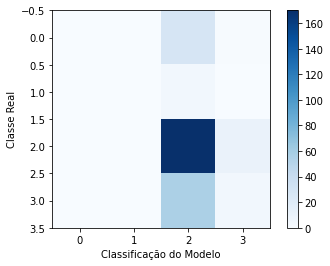

In [ ]:
# Suponha que temos as seguintes previsões e classes reais
# para um conjunto de dados:


# Geramos a matriz de confusão usando a função confusion_matrix do scikit-learn
confusion_mat = confusion_matrix(y_teste2, previsoes_teste)

# Criamos um gráfico usando matplotlib
plt.imshow(confusion_mat, cmap='Blues')

# Adicionamos rótulos nas linhas e colunas
class_names = ['0', '1','2','3']


# Adicionamos rótulos na barra de cores
plt.colorbar()

# Adicionamos rótulos nos eixos
plt.xlabel('Classificação do Modelo')
plt.ylabel('Classe Real')

# Exibimos o gráfico
plt.show()


In [ ]:
erro_medio

0.7645854949951172

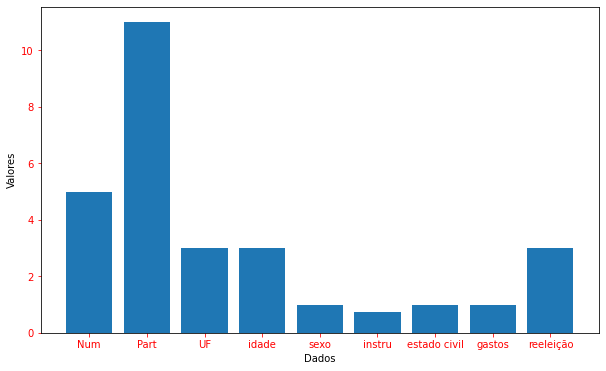

In [ ]:
import matplotlib.pyplot as plt

# Dados para o eixo x e y
x = [5 , 11, 3, 3, 1, 0.75,  1 ,1, 3]
y = ['Num', 'Part', 'UF', 'idade', 'sexo', 'instru', 'estado civil', 'gastos', 'reeleição']

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(y, x)
# Adiciona rótulos ao eixo x e y
plt.xlabel('Dados')
plt.ylabel('Valores')
plt.tick_params(axis='x', colors='red')
plt.tick_params(axis='y', colors='red')

# Exibe o gráfico
plt.show()
